In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

import sklearn
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


from scipy.stats import t, shapiro
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

from functions import *

%matplotlib inline

# I. Data importation & exploration

In [2]:
# Chargement des données
raw_data = pd.read_csv('billets.csv', sep=";")

In [3]:
raw_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
raw_data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
# Résumé des données brutes
raw_data.describe()

# std important pour margin_low et length

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [7]:
raw_data.duplicated().sum() # Pas de valeurs dupliquées.

0

In [8]:
raw_data.isna().sum() # 37 billets manquent la valeur en margin_low

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
raw_data[raw_data.isna().any(axis=1)] # 8 faux billets manquent margin_low, 29 vrai billets manquent margin_low

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [10]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=raw_data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          2.60e-202
Time:                        13:15:23   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.477 would mean our model explains 47.7% of the change in our ‘Lottery’ variable.

## Vérifier la colinéarité des variables

In [11]:
# En dessous de 5, il n'y a pas de probleme de colinéarité. The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.
#One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686302,
 1.138260573608248,
 1.2301145155560367,
 1.4044037781843626,
 1.5769501453665806]

## Testez l’homoscédasticité

In [12]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216275702e-16


La p-valeur ici est inférieure à $5$%, on rejette l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité), donc c'est heteroscédasticité.

## Testez la normalité des résidus Shapiro

In [13]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

Ici, l'hypothèse de normalité est remise en cause (p-value = 8.536943374437556e-11 < 0.05).

Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que **les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes**, même si le résidu n'est pas considéré comme étant gaussien.



## Linear Regression

In [14]:
test_data = raw_data[raw_data['margin_low'].isnull()]
test_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [15]:
nndata = raw_data.dropna()

In [16]:
y = nndata.margin_low
X = nndata.drop(columns=["margin_low","is_genuine"])

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X, y)

LinearRegression()

In [19]:
x_test = test_data[['diagonal', 'height_left','height_right','margin_up','length']]
x_test

,diagonal,height_left,height_right,margin_up,length
72,171.94,103.89,103.45,3.25,112.79
99,171.93,104.07,104.18,3.14,113.08
151,172.07,103.80,104.38,3.02,112.93
197,171.45,103.66,103.80,3.62,113.27
241,171.83,104.14,104.06,3.02,112.36
251,171.80,103.26,102.82,2.95,113.22
284,171.92,103.83,103.76,3.23,113.29
334,171.85,103.70,103.96,3.00,113.36
410,172.56,103.72,103.51,3.12,112.95
413,172.30,103.66,103.50,3.16,112.95


In [20]:
y_pred = lr.predict(x_test)
y_pred[:20]

array([4.31852466, 4.39366755, 4.41045663, 4.31901423, 4.6506171 ,
       3.80330831, 4.17973608, 4.12744154, 4.13503418, 4.16053851,
       4.17742026, 3.76855378, 4.05876385, 4.29804709, 4.16060746,
       4.09406453, 4.43984627, 4.47065037, 4.34164322, 4.08041448])

In [21]:
# Remplacer les valeurs nulls dans le data set

raw_data.loc[raw_data['margin_low'].isnull(), 'margin_low'] = y_pred

In [22]:
raw_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [23]:
raw_data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## A. Separer le raw data en 2 data sets : vrais billets & faux billets

In [24]:
vb=raw_data.loc[raw_data['is_genuine']== True]
vb=vb.drop(columns='is_genuine')
vb.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [25]:
vb.count()

diagonal        1000
height_left     1000
height_right    1000
margin_low      1000
margin_up       1000
length          1000
dtype: int64

In [26]:
# separer le raw data en 2 data set : vrais billets & faux billets
fb=raw_data.loc[raw_data['is_genuine']== False]
fb=fb.drop(columns='is_genuine')
fb.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
1000,172.28,103.95,103.91,4.78,3.31,111.40
1001,171.92,103.86,104.30,4.96,3.13,111.29
1002,171.59,104.14,104.38,4.97,3.47,111.22
1003,172.02,104.33,104.33,5.19,3.21,111.99
1004,172.55,104.25,104.23,5.60,3.13,111.72


In [27]:
fb.count()

diagonal        500
height_left     500
height_right    500
margin_low      500
margin_up       500
length          500
dtype: int64

In [28]:
vb.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.118174,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.317575,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.910000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.120000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [29]:
fb.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.214079,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.550363,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.180000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.590000,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


# II. PCA

In [87]:
# selection des colonnes à prendre en compte dans l'ACP

data_pca = raw_data[['diagonal', 'height_left','height_right','margin_low','margin_up','length']]

X_pca = data_pca.values
X_pca

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       ...,
       [171.8 , 104.01, 104.12,   5.51,   3.36, 111.95],
       [172.06, 104.28, 104.06,   5.17,   3.46, 112.25],
       [171.47, 104.15, 103.82,   4.63,   3.37, 112.07]])

In [88]:
names = raw_data["is_genuine"]
features = data_pca.columns

In [89]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X_pca)
X_scaled = std_scale.transform(X_pca)
print(X_scaled)

[[-0.48653957  2.77412327  3.16324041  0.0553898  -1.128325    0.17365114]
 [-1.63372936 -2.23653528 -0.79966777 -1.08198744 -0.69679916  0.47166629]
 [ 2.3978233   1.50475644 -1.29119126 -0.12659056 -0.91256208  0.55190114]
 ...
 [-0.51931643 -0.06524991  0.61346228  1.55672775  0.89984645 -0.83501554]
 [ 0.3328817   0.83666863  0.42914097  1.04111674  1.33137229 -0.4911519 ]
 [-1.6009525   0.40241156 -0.30814427  0.22220513  0.94299904 -0.69747008]]


In [33]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

PCA()

Text(0.5, 1.0, 'Scree Plot')

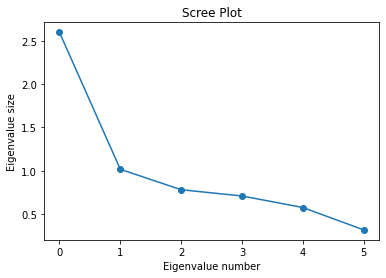

In [34]:
# Select the Best Number of Principal Components for the Dataset

plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

# D'apres les resultats, avec 2 composants nous arrivons a avoir 60% d'inertie, qui est suffisant.

In [35]:
#Pourcentage de variance expliquée
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum()) 

[0.43288253 0.16956616 0.13025062 0.11824871 0.09602704 0.05302493]
1.0


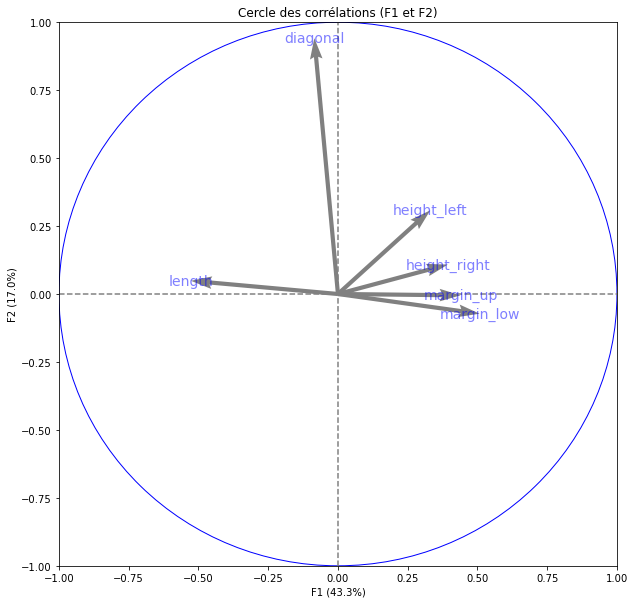

In [36]:
# choix du nombre de composantes
n_comp = 2

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

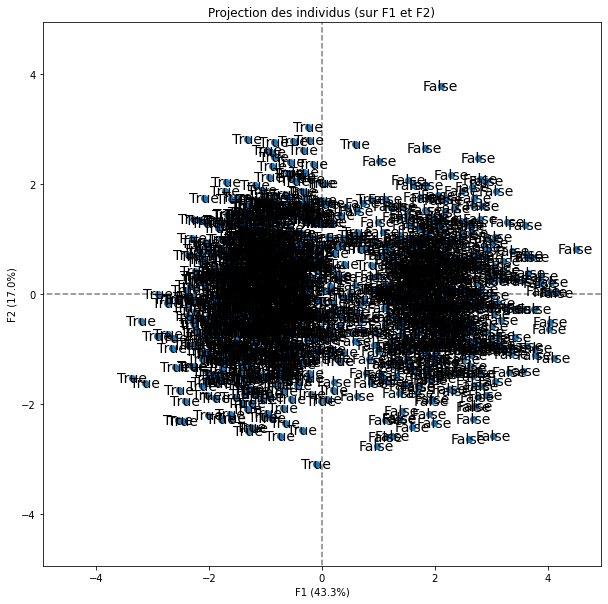

In [37]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

In [38]:
# Nous souhaitons avoir 2 clusters
# Clustering hiérarchique methode Ward
Z = linkage(X_scaled, 'ward')
clusters = fcluster(Z, t=2, criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

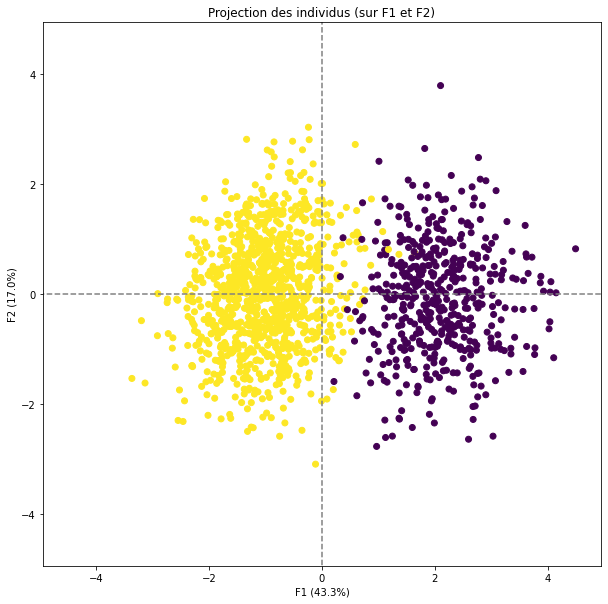

In [39]:
# Projection des groupe
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], clusters=clusters)

Constat:

La longueur est positivement corrélée à l’authenticité d’un billet.

Les variables height_left, height_right, margin_up,margin_low sont négativements corrélées à l’authenticité d’un billet.

Les faux billets sont moins en longeur et sont plus en hauteur; avec un margin_low beaucoup plus important que les vrais billets, dont les 2 ecarts types sont plus importants que ceux des vrais billets.

Les vrais billets sont plus en longeur et sont moins en hauteur.

Les diagonals ne joue pas un role important pour distinguer les vrais et les faux billets.

# III. K-means

In [139]:
raw_data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [140]:
df=raw_data[['diagonal','height_left','height_right','margin_low','margin_up','length']]
df.values[:] = preprocessing.StandardScaler().fit_transform(df)

In [141]:
#df['is_genuine'] = raw_data['is_genuine']

In [142]:
df

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.055390,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.081987,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.126591,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.309463,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672532,1.417677,-0.158750
...,...,...,...,...,...,...
1495,-0.683201,1.170713,0.767063,-0.096260,-0.265273,-1.602978
1496,0.758981,2.005822,1.596509,1.192767,0.942999,-1.958303
1497,-0.519316,-0.065250,0.613462,1.556728,0.899846,-0.835016
1498,0.332882,0.836669,0.429141,1.041117,1.331372,-0.491152


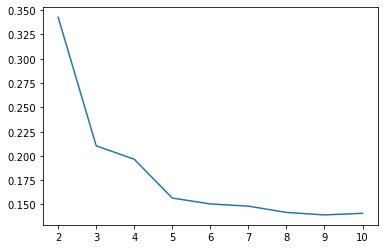

In [143]:
# Definir le K de K-means avec silouette
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

plt.plot(list(range(2, kmax+1)), sil)
plt.show()

In [144]:
# On instancie notre Kmeans avec 2 clusters : 
kmeans = KMeans(n_clusters=2)

# On l'entraine : 
kmeans.fit(df[['diagonal','height_left','height_right','margin_low','margin_up','length']].values)

# On peut stocker nos clusters dans une variable labels : 
labels_kmeans = kmeans.labels_

centroids = kmeans.cluster_centers_
centroids

array([[ 0.09600039, -0.28194592, -0.35241933, -0.55244545, -0.42692359,
         0.59324013],
       [-0.19432338,  0.57071311,  0.71336493,  1.11825652,  0.86417597,
        -1.20083284]])

In [145]:
# On utilise bien le scaler déjà entrainé : 

centroids_proj = pca.transform(centroids)

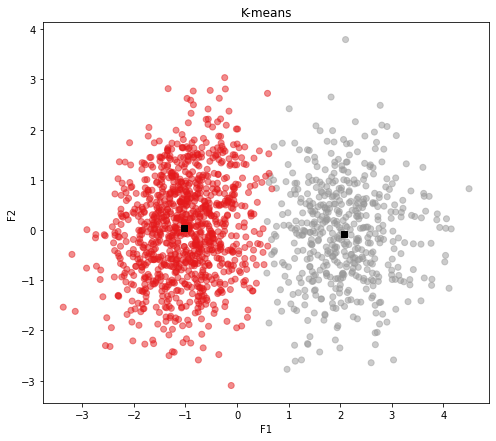

In [146]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_projected[:, 0], X_projected[:, 1], c=labels_kmeans, cmap="Set1", alpha =0.5)


# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj[:, 0], centroids_proj[:, 1],  marker="s", c="black" )

# Nous avons 2 graphiques des clusters avec K-means et avec CSH pour faire la comparaison
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.title("K-means")

plt.show()

In [149]:
# Matrice de confusion

print("Matrice de confusion")
mdc = pd.crosstab(clusters,raw_data.is_genuine)
mdc.index = ['Cluster 1','Cluster 2']
mdc.columns = ['Faux','Vrais']
mdc

Matrice de confusion


,Faux,Vrais
Cluster 1,484,4
Cluster 2,16,996


### Data set Test & Train

In [159]:
# 80% of data set est le train set, 20% of data set est le test set
from sklearn.model_selection import train_test_split
vf = list(map(lambda x: 1 if x else 0, names))

xtrain, xtest, ytrain, ytest = train_test_split(df, vf, train_size=0.8)


### Utiliser la méthode K-means pour prédire les billets

In [160]:
from sklearn.preprocessing import scale
model = KMeans(n_clusters=2)

model = model.fit(xtrain, ytrain) 

yhat = model.predict(xtest)

print(f"Il y a {np.sum(np.abs(yhat - ytest))} erreurs")

Il y a 4 erreurs


In [161]:
# Matrice de confusion

print("Matrice de confusion")
mdc2 = pd.crosstab(yhat,ytest)
mdc2.columns = ['Faux','Vrais']
mdc2.index = ['Cluster 1','Cluster 2']
mdc2

Matrice de confusion


,Faux,Vrais
Cluster 1,96,2
Cluster 2,2,200


What is the difference between precision and accuracy and recall?

Accuracy tells you how many times the ML model was correct overall. 

Precision is how good the model is at predicting a specific category. 

Recall tells you how many times the model was able to detect a specific category.

In [162]:
print(accuracy_score(ytest, yhat))
print(precision_score(ytest, yhat))
print(recall_score(ytest, yhat))

0.9866666666666667
0.9900990099009901
0.9900990099009901


# V. Utiliser la méthode régression logistique pour prédire les billets

In [163]:
raw_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [164]:
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)


LogisticRegression()

In [165]:
xtrain

,diagonal,height_left,height_right,margin_low,margin_up,length
266,-0.027664,-0.299081,-0.369585,-0.581541,1.115609,0.804068
797,0.005113,0.502625,0.367701,0.131215,-1.257783,1.033310
1237,-0.781531,0.068368,1.350748,1.389912,2.582797,-1.247652
508,-0.453763,0.302198,0.091219,-0.460221,-0.610494,0.907227
65,0.398435,1.538161,0.121939,-0.156921,-0.049510,0.849916
...,...,...,...,...,...,...
794,-0.257102,-0.633125,-0.154543,-0.460221,1.676593,0.723833
558,-0.486540,-0.800146,0.060498,-0.520881,-0.308426,-0.067053
1189,0.726204,1.671778,0.674903,2.254319,0.123100,-1.797834
928,1.414518,0.168581,-0.492466,-0.960667,-0.869409,0.632136


In [166]:
prob = logistic.predict_proba(xtest)

prob #1ère colonne proba que ce soit faux, 2ème colonne vrai

array([[9.99989589e-01, 1.04112093e-05],
       [9.99598665e-01, 4.01334730e-04],
       [9.90057146e-01, 9.94285354e-03],
       [9.99892223e-01, 1.07776629e-04],
       [9.96430685e-01, 3.56931458e-03],
       [5.10563244e-03, 9.94894368e-01],
       [4.51707122e-02, 9.54829288e-01],
       [9.96809583e-01, 3.19041716e-03],
       [2.04884281e-04, 9.99795116e-01],
       [2.07355914e-03, 9.97926441e-01],
       [9.99907907e-01, 9.20925091e-05],
       [6.85892304e-04, 9.99314108e-01],
       [6.62872532e-05, 9.99933713e-01],
       [8.87821782e-01, 1.12178218e-01],
       [9.98684047e-01, 1.31595255e-03],
       [9.99669173e-01, 3.30827235e-04],
       [9.64890969e-05, 9.99903511e-01],
       [4.62548704e-05, 9.99953745e-01],
       [9.98983788e-01, 1.01621196e-03],
       [1.88759606e-02, 9.81124039e-01],
       [3.08111553e-04, 9.99691888e-01],
       [9.99991030e-01, 8.97004385e-06],
       [4.77335651e-05, 9.99952266e-01],
       [9.99941118e-01, 5.88819958e-05],
       [1.057410

In [167]:
yhat=logistic.predict(xtest)

In [168]:
# Matrice de confusion

print("Matrice de confusion")
mdc3 = pd.crosstab(yhat,ytest)
mdc3.columns = ['Faux','Vrais']
mdc3.index = ['Cluster 1','Cluster 2']
mdc3

Matrice de confusion


,Faux,Vrais
Cluster 1,97,1
Cluster 2,1,201


In [169]:
print(accuracy_score(ytest, yhat))
print(precision_score(ytest, yhat))
print(recall_score(ytest, yhat))

0.9933333333333333
0.995049504950495
0.995049504950495


## Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [170]:
# AUC
sklearn.metrics.roc_auc_score(ytest, yhat) # notre modele est de tres bonne qualite

0.9924227116589209

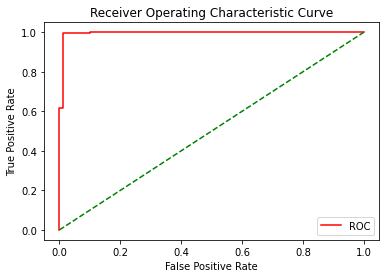

In [171]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


prob = prob[:, 1]
fper, tper, thresholds = roc_curve(ytest, prob)
plot_roc_curve(fper, tper)

ROC curve. The term ROC curve stands for Receiver Operating Characteristic curve. 
This curve is basically a graphical representation of the performance of any classification model at all classification thresholds.

There are two parameters of this curve:

True Positive Rate(TPR) - Stands for real, i.e true sensitivity
    
False Positive Rate(FPR) - Stands for pseudo, i.e false sensitivity

### Conclusion: nous options pour la regression logistique avec meilleure accurancy a 99%

# Test en live

In [174]:
# Chargement des données, a changer le nom du fichier de test
test_data = pd.read_csv('billets_test.csv', sep=",")
test_data

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [176]:
xtest = test_data.iloc[:,:-1]

In [177]:
pd.concat([test_data['id'],pd.DataFrame(logistic.predict(scale(xtest)), columns = ['Billet vrai ou faux']),pd.DataFrame(logistic.predict_proba(scale(xtest))[:,1], columns = ['Probabilite des vrai ou faux billets'])],axis=1)

/Users/ying/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ying/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,id,Billet vrai ou faux,Probabilite des vrai ou faux billets
0,B_1,1,0.999971
1,B_2,0,0.072675
2,B_3,1,0.999982
3,B_4,0,0.000126
4,B_5,0,0.344784


Conlcusion: 3 billets faux (0), 2 billets vrais (1)